In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
import warnings
warnings.filterwarnings('ignore')

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

In [173]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [174]:
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

# Reading the dataset

In [175]:
data=pd.read_csv(r"c:\Users\himanshu\Downloads\breast-cancer.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [176]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [178]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

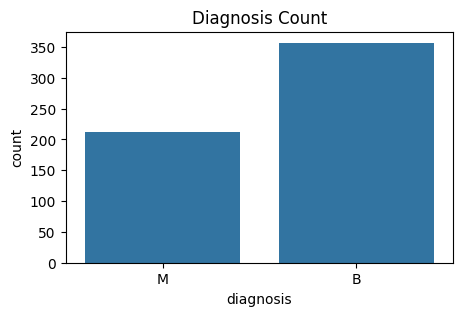

In [179]:
# Count of Diagnosis (M = Malignant, B = Benign)
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count')
plt.show()

In [180]:
data.groupby(data.diagnosis).mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
B                     0.025717       0.174186  ...     13.379801   
M                     0.087990       0.192909  ...     21.134811   

           texture_worst  perimeter_worst   area_worst  smoothness_worst  \
diagnosis                                                                  
B              23.515070        87.005938   558.899440          0.124959   
M              29.318208       141.370330  1422.286321          0.144845   

           compactness_worst  concavity_worst  concave points_worst  \
diagnosis                                                             
B                   0.182673         0.166238              0.074444   
M                   0.374824         0.450606              0.182237   

           symmetry_worst  fractal_dimension_worst  
diagnosis                                           
B                0.270246                 0.079442  
M                0.323468                 0.091530  

[2 rows x 31 columns]

In [181]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [182]:
# data.drop('Unnamed: 32', axis=1, inplace=True)

In [183]:
data.duplicated().sum()

0

In [184]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

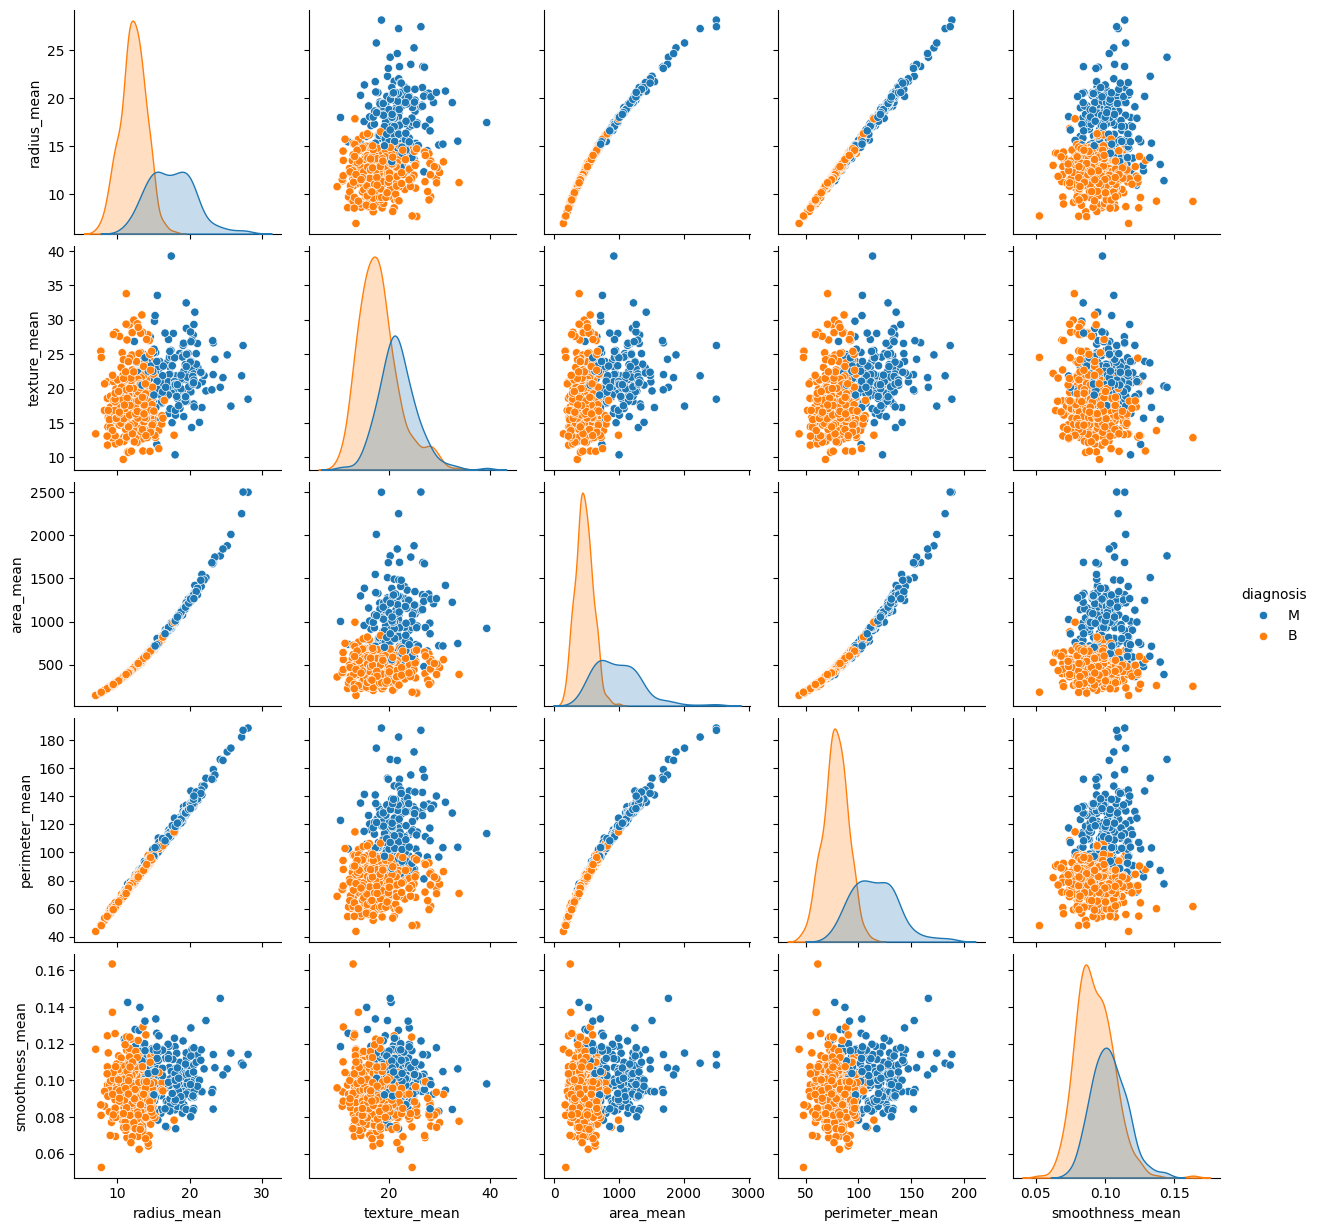

In [185]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

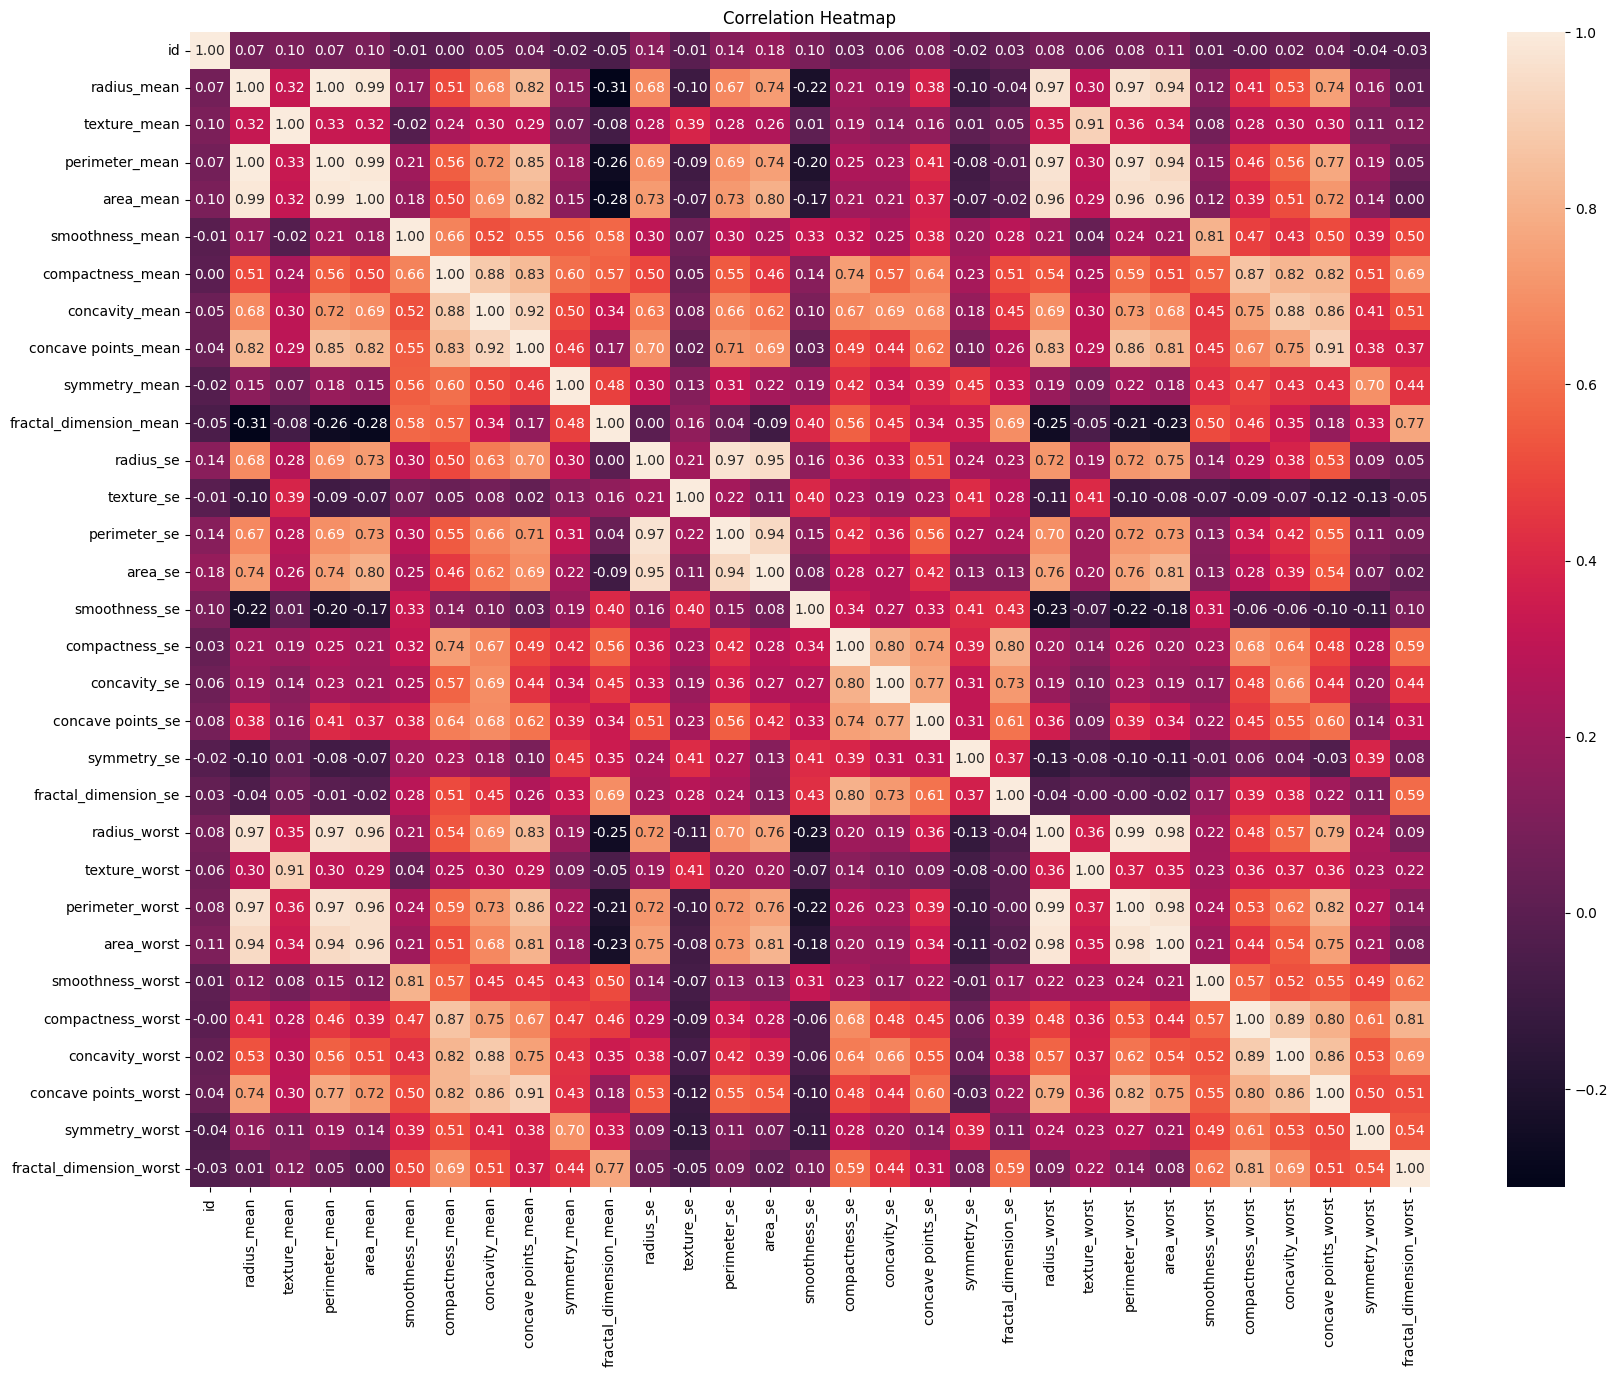

In [186]:
# Correlation heatmap of features
plt.figure(figsize=(20,15))
# Calculate correlation only for numeric columns
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

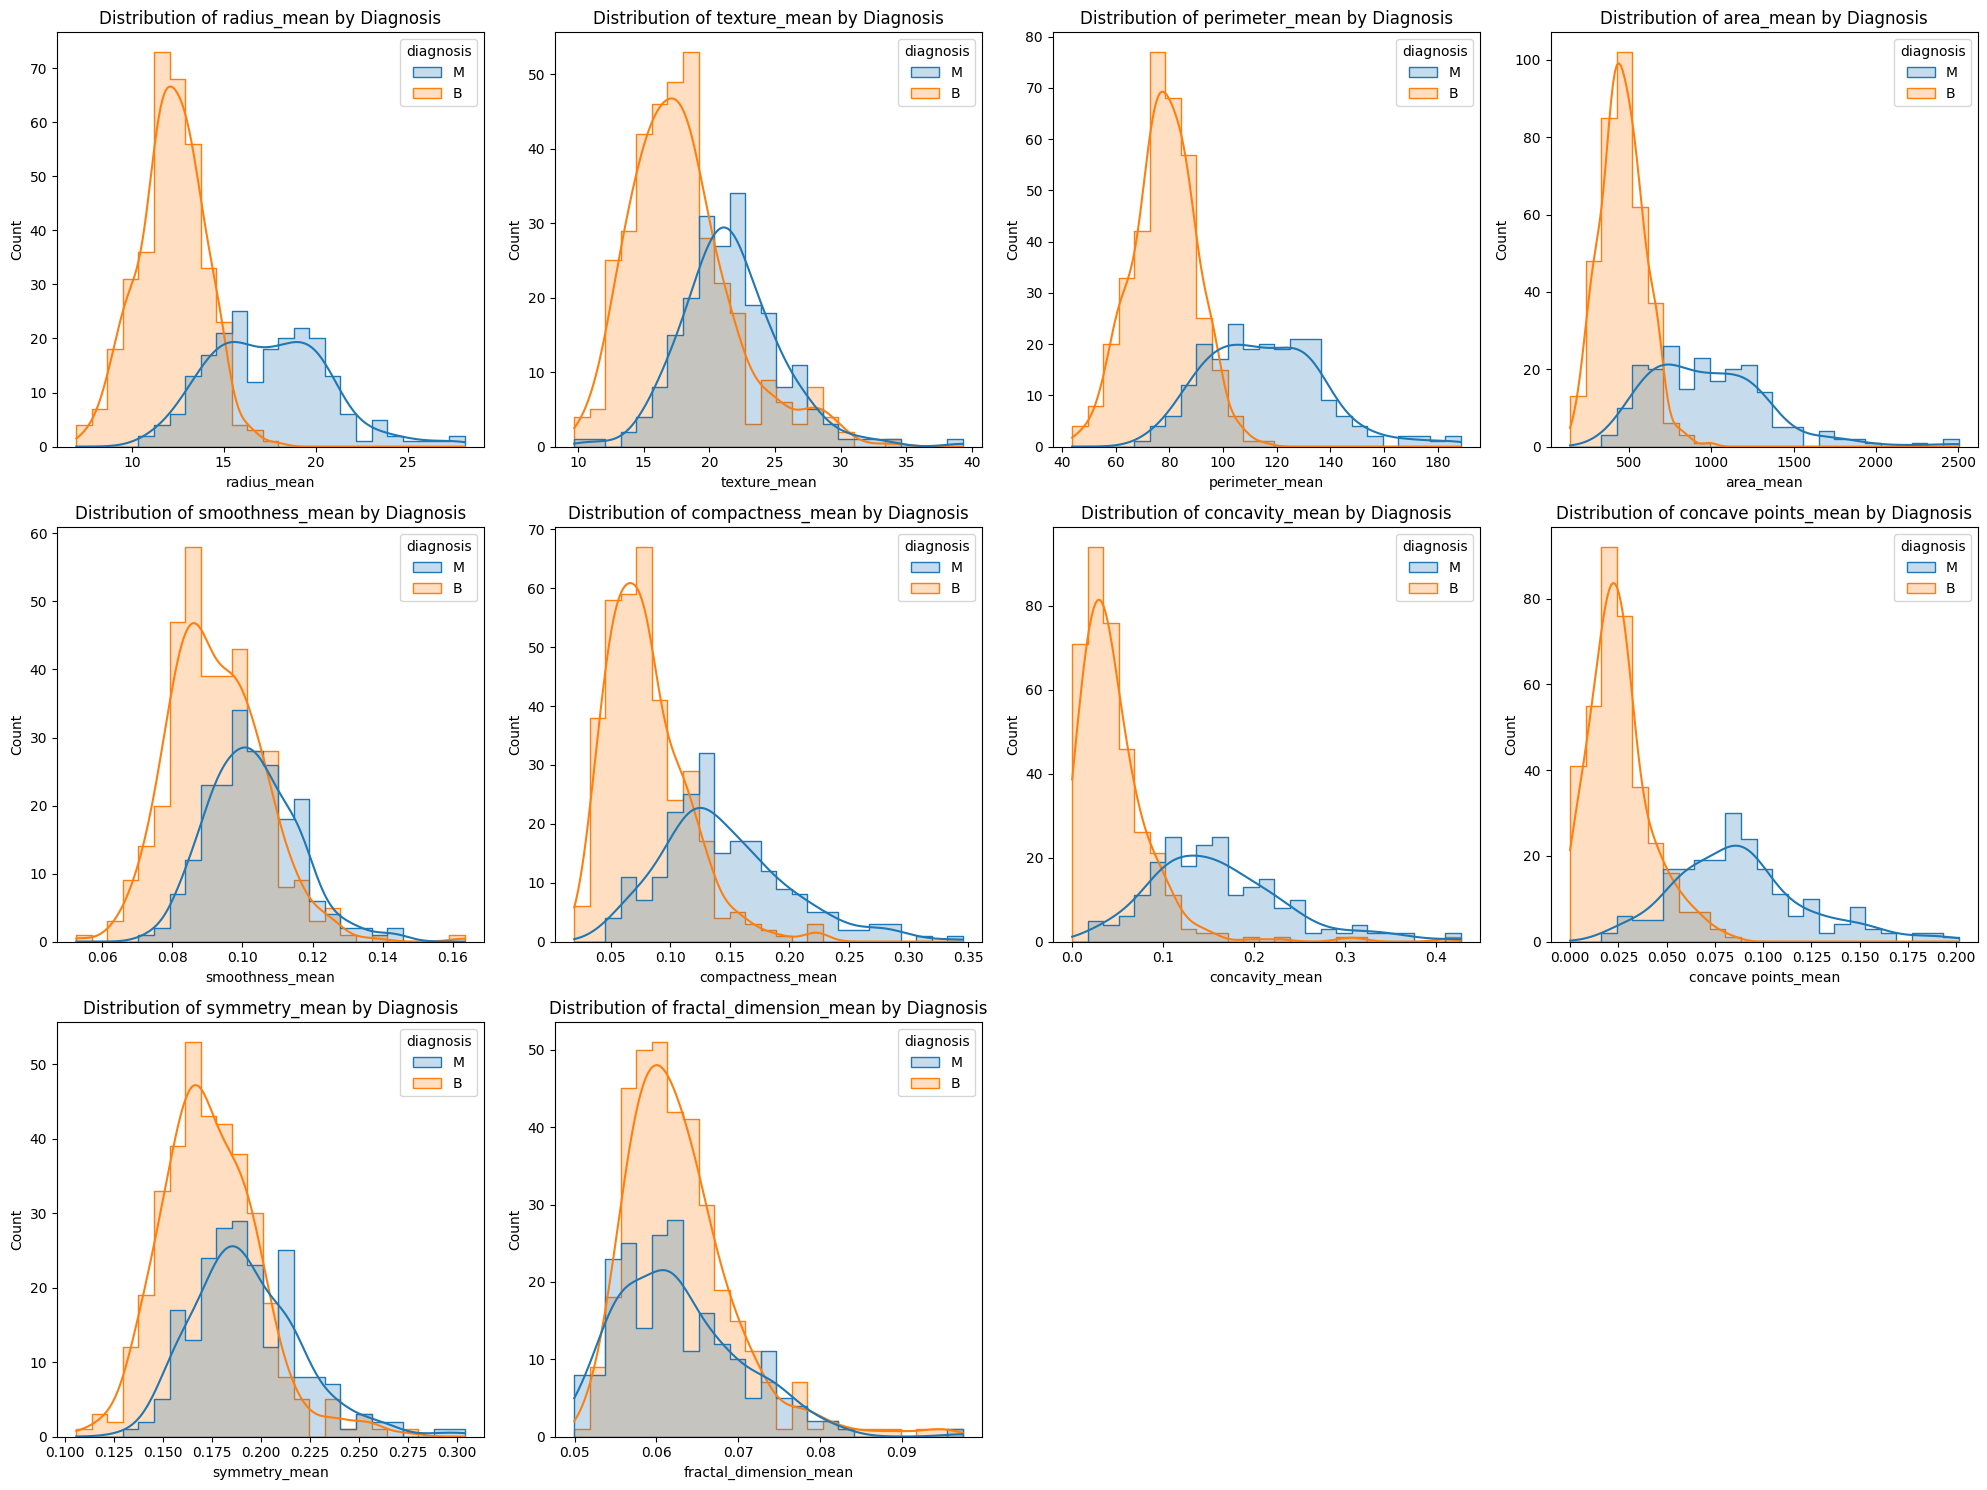

In [187]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = data.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()


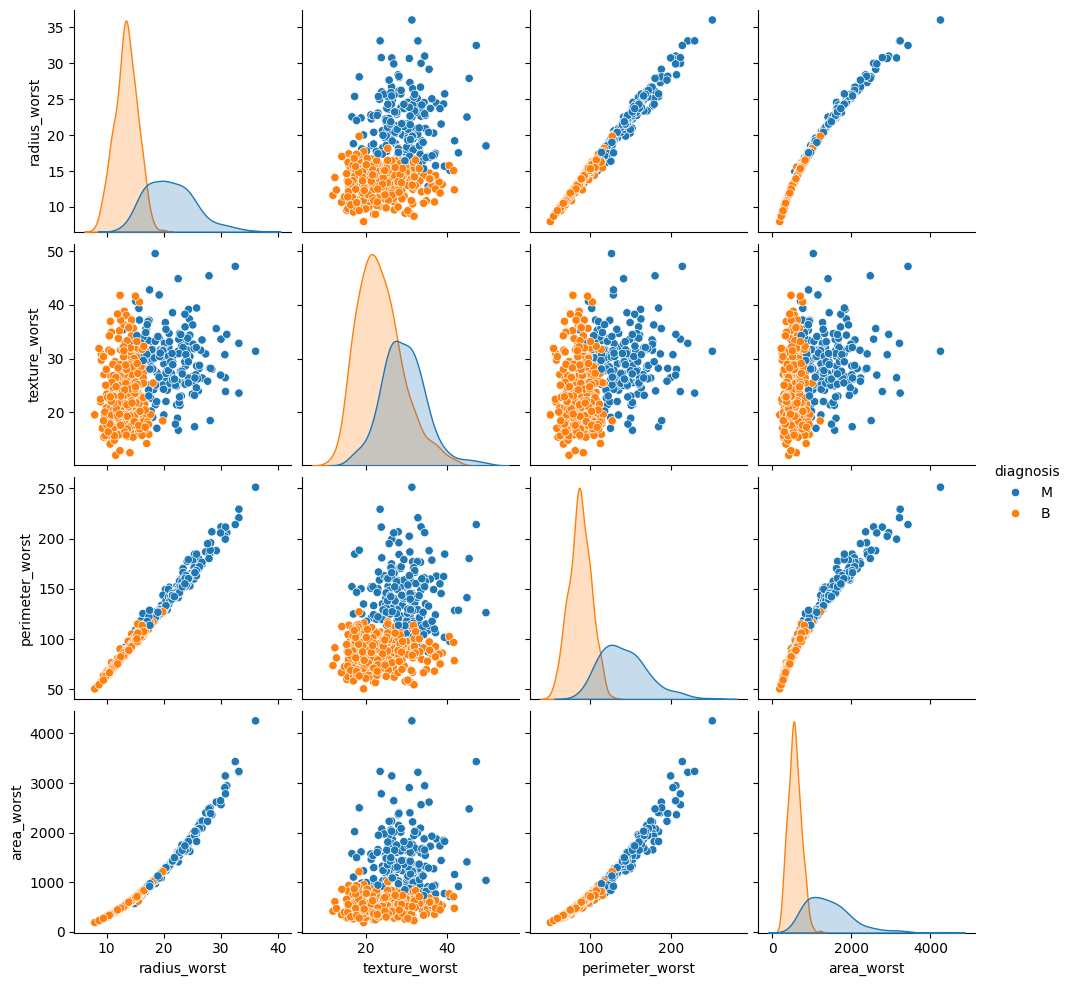

In [188]:
worst_features = data[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']]

# Creating a pairplot for "worst" features
sns.pairplot(worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

# Splitting the dataset

In [189]:
X=data.drop(['id','diagnosis'],axis=1)
y=data['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [190]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [191]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [192]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

# Train Test Split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [194]:
X_train.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [195]:
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
279       13.850         15.18           88.99      587.4          0.09516   
325       12.670         17.30           81.25      489.9          0.10280   
92        13.270         14.76           84.74      551.7          0.07355   
557        9.423         27.88           59.26      271.3          0.08123   
232       11.220         33.81           70.79      386.8          0.07780   
..           ...           ...             ...        ...              ...   
482       13.470         14.06           87.32      546.3          0.10710   
437       14.040         15.98           89.78      611.2          0.08458   
461       27.420         26.27          186.90     2501.0          0.10840   
227       15.000         15.51           97.45      684.5          0.08371   
359        9.436         18.32           59.82      278.6          0.10090   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
279           0.07688        0.044790             0.037110         0.2110   
325           0.07664        0.031930             0.021070         0.1707   
92            0.05055        0.032610             0.026480         0.1386   
557           0.04971        0.000000             0.000000         0.1742   
232           0.03574        0.004967             0.006434         0.1845   
..                ...             ...                  ...            ...   
482           0.11550        0.057860             0.052660         0.1779   
437           0.05895        0.035340             0.029440         0.1714   
461           0.19880        0.363500             0.168900         0.2061   
227           0.10960        0.065050             0.037800         0.1881   
359           0.05956        0.027100             0.014060         0.1506   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
279                 0.05853  ...         14.98          21.74   
325                 0.05984  ...         13.71          21.10   
92                  0.05318  ...         16.36          22.35   
557                 0.06059  ...         10.49          34.24   
232                 0.05828  ...         12.36          41.78   
..                      ...  ...           ...            ...   
482                 0.06639  ...         14.83          18.32   
437                 0.05898  ...         15.66          21.58   
461                 0.05623  ...         36.04          31.37   
227                 0.05907  ...         16.41          19.31   
359                 0.06959  ...         12.02          25.02   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
279            98.37       670.0           0.11850            0.17240   
325            88.70       574.4           0.13840            0.12120   
92            104.50       830.6           0.10060            0.12380   
557            66.50       330.6           0.10730            0.07158   
232            78.44       470.9           0.09994            0.06885   
..               ...         ...               ...                ...   
482            94.94       660.2           0.13930            0.24990   
437           101.20       750.0           0.11950            0.12520   
461           251.20      4254.0           0.13570            0.42560   
227           114.20       808.2           0.11360            0.36270   
359            75.79       439.6           0.13330            0.10490   

     concavity_worst  concave points_worst  symmetry_worst  \
279          0.14560               0.09993          0.2955   
325          0.10200               0.05602          0.2688   
92           0.13500               0.10010          0.2027   
557          0.00000               0.00000          0.2475   
232          0.02318               0.03002          0.2911   
..               ...                   ...             ...   
482          0.18480               0.13350         

In [196]:
y_train

541    0
151    0
133    0
244    1
559    0
      ..
493    0
453    0
106    0
30     1
17     1
Name: diagnosis, Length: 455, dtype: int64

# Scaling the data

In [197]:
scaler = StandardScaler()

In [198]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [199]:
X_train

array([[ 0.07839285,  1.37085302,  0.13514936, ...,  0.0461983 ,
         0.41969321,  0.96404128],
       [-1.67237335,  0.34231806, -1.59065847, ..., -0.5800047 ,
         0.63442168,  3.4761728 ],
       [ 0.42568929, -1.28080121,  0.38627185, ...,  0.29992237,
        -0.31833648, -0.74995947],
       ...,
       [-0.71422727, -0.22589356, -0.70219605, ...,  0.06571554,
        -0.18631824,  0.34930153],
       [ 1.24351641,  1.39962323,  1.31124642, ...,  1.0115508 ,
         0.82847259,  0.72096678],
       [ 0.54332196,  0.33752302,  0.63374311, ...,  1.34934911,
         1.24520488,  1.60970791]])

In [200]:
X_train.shape

(455, 30)

In [201]:
y_train.shape

(455,)

In [202]:
y_test.shape

(114,)

In [203]:
X_test.shape

(114, 30)

# Model


In [204]:
compare=pd.DataFrame({'Model':[], "Training Accuracy":[], "Testing Accuracy":[], "F1 Score":[], "Recall":[],
                     "Precision":[]})
compare

Empty DataFrame
Columns: [Model, Training Accuracy, Testing Accuracy, F1 Score, Recall, Precision]
Index: []

* ## Logistic Regression

In [205]:
LR=LogisticRegression()

In [206]:
LR.fit(X_train,y_train)

LogisticRegression()

In [207]:
LR.score(X_train,y_train)*100

98.46153846153847

In [208]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        38

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [210]:
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9846153846153847
Testing Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0


In [211]:
compare.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

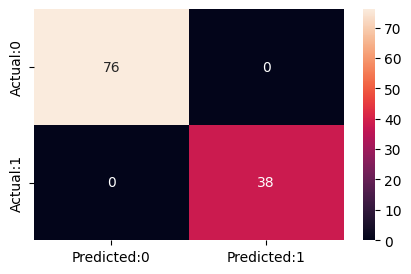

In [212]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Support Vector Machine

In [213]:
svm=SVC()

In [214]:
svm.fit(X_train,y_train)

SVC()

In [215]:
y_pred=svm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [216]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.97      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [217]:
train_acc=svm.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9824175824175824
Testing Accuracy : 0.9912280701754386
F1 Score : 0.9866666666666667
Recall : 0.9736842105263158
Precision : 1.0


In [218]:
compare.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]

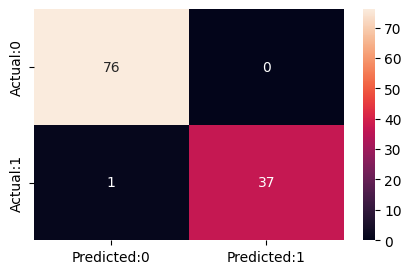

In [219]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## KNN

In [220]:
knn=KNeighborsClassifier(n_neighbors=9)

In [221]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [222]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [223]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.97      0.89      0.93        38

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [224]:
train_acc=knn.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9714285714285714
Testing Accuracy : 0.956140350877193
F1 Score : 0.9315068493150684
Recall : 0.8947368421052632
Precision : 0.9714285714285714


In [225]:
compare.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

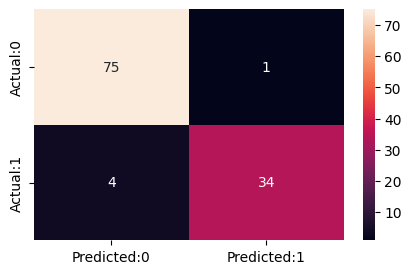

In [226]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Naives Bayes

In [227]:
NB = GaussianNB()

In [228]:
NB.fit(X_train,y_train)

GaussianNB()

In [229]:
y_pred=NB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.87      0.93        38

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



In [231]:
train_acc=NB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9340659340659341
Testing Accuracy : 0.956140350877193
F1 Score : 0.9295774647887324
Recall : 0.868421052631579
Precision : 1.0


In [232]:
compare.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

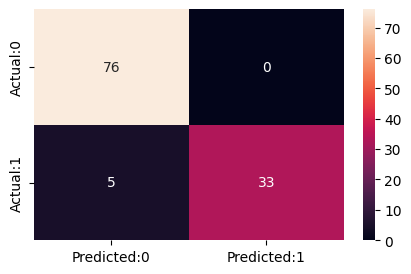

In [233]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Decision Tree

In [234]:
DT=DecisionTreeClassifier(random_state=8)

In [235]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [236]:
y_pred = DT.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0
 1 0 0]


In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [238]:
train_acc=DT.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9473684210526315
F1 Score : 0.9210526315789473
Recall : 0.9210526315789473
Precision : 0.9210526315789473


In [239]:
compare.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

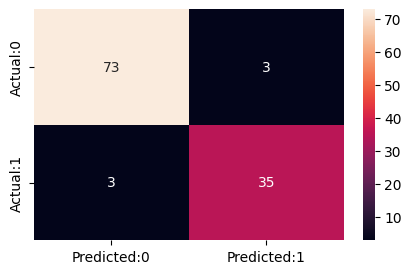

In [240]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Random forest

In [241]:
RF=RandomForestClassifier(n_estimators=50,random_state=1)

In [242]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [243]:
y_pred=RF.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [244]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       1.00      0.89      0.94        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [245]:
train_acc=RF.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9444444444444444
Recall : 0.8947368421052632
Precision : 1.0


In [246]:
compare.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

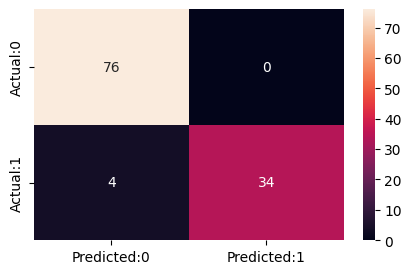

In [247]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Gradient Boosting

In [248]:
GB=GradientBoostingClassifier(n_estimators=12)

In [249]:
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [250]:
y_pred=GB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [251]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.95      0.97        38

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [252]:
train_acc=GB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9912087912087912
Testing Accuracy : 0.9824561403508771
F1 Score : 0.972972972972973
Recall : 0.9473684210526315
Precision : 1.0


In [253]:
compare.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

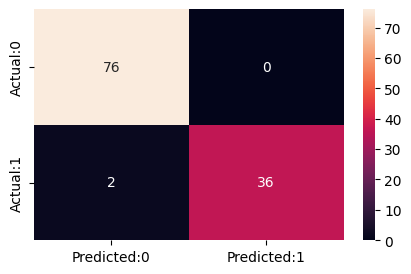

In [254]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Stochastic Gradient Descent

In [255]:
SGD=SGDClassifier(loss='modified_huber', random_state=10)

In [256]:
SGD.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', random_state=10)

In [257]:
y_pred=SGD.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.93      1.00      0.96        38

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [259]:
train_acc=SGD.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9846153846153847
Testing Accuracy : 0.9736842105263158
F1 Score : 0.9620253164556962
Recall : 1.0
Precision : 0.926829268292683


In [260]:
compare.loc[7]=['Stochastic Gradient Descent', train_acc, test_acc, f1, recal, prec]

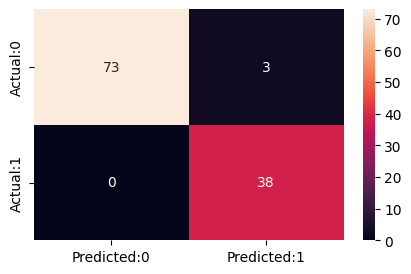

In [261]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## XGBoost

In [262]:
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree')

In [263]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=88,
              n_jobs=None, num_parallel_tree=None, ...)

In [264]:
y_pred=XGB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0])

In [265]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        38

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [266]:
train_acc=XGB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 1.0
F1 Score : 1.0
Recall : 1.0
Precision : 1.0


In [267]:
compare.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

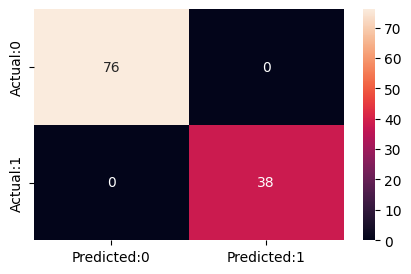

In [268]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## LGBM

In [269]:
LGBM=LGBMClassifier(random_state=0,n_estimators=22)

In [270]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 174, number of negative: 281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382418 -> initscore=-0.479299
[LightGBM] [Info] Start training from score -0.479299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(n_estimators=22, random_state=0)

In [271]:
y_pred=LGBM.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [272]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.92      0.96        38

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [273]:
train_acc=LGBM.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9912087912087912
Testing Accuracy : 0.9736842105263158
F1 Score : 0.958904109589041
Recall : 0.9210526315789473
Precision : 1.0


In [274]:
compare.loc[9]=['LGBM', train_acc, test_acc, f1, recal, prec]

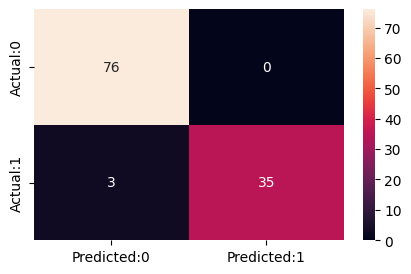

In [275]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Neural Network

In [276]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [277]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,302 (12.90 KB)

 Trainable params: 3,302 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

In [278]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,shuffle=True)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6299 - loss: 0.5998 - val_accuracy: 0.8696 - val_loss: 0.2906
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9504 - loss: 0.2577 - val_accuracy: 0.9783 - val_loss: 0.1593
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9671 - loss: 0.1759 - val_accuracy: 0.9783 - val_loss: 0.1143
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9626 - loss: 0.1487 - val_accuracy: 0.9783 - val_loss: 0.0924
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9638 - loss: 0.1333 - val_accuracy: 0.9783 - val_loss: 0.0787
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9730 - loss: 0.1226 - val_accuracy: 0.9783 - val_loss: 0.0686
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9761 - loss: 0.1146 - val_accuracy: 0.9783 - val_loss: 0.0604
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9761 - loss: 0.1083 - val_accuracy: 0.9783 - val_los

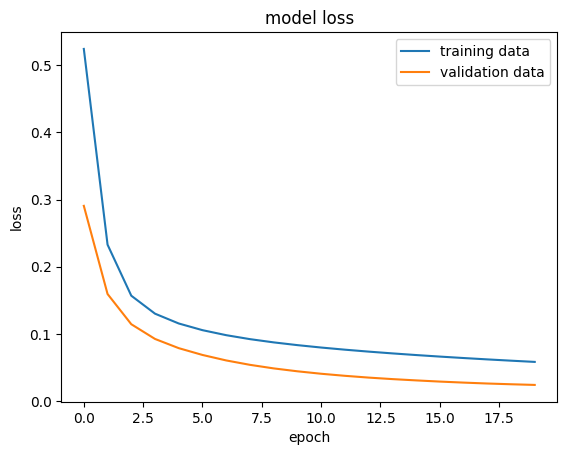

In [279]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

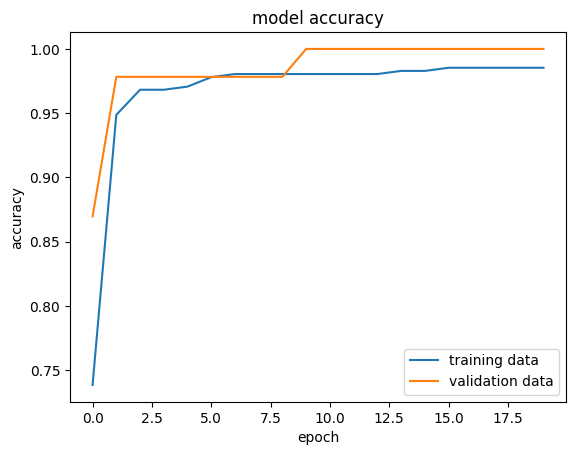

In [280]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [281]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9913 - loss: 0.0434 


In [282]:
X_test[0]

array([-0.09525538, -0.98111154, -0.14153163, -0.20647254, -0.14256806,
       -0.55982099, -0.58615642, -0.34589987,  1.02192499, -0.63348418,
       -0.58239799, -0.55304737, -0.52723872, -0.49456216, -0.92989404,
       -0.58475016, -0.57282274, -0.24946955, -0.63934273, -0.85879972,
       -0.27713754, -0.65401269, -0.27744259, -0.38244802, -0.64880911,
       -0.54985383, -0.63677937, -0.26262442,  0.05067837, -0.83622922])

In [283]:
y_pred = model.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[9.14901614e-01, 1.31793454e-01],
       [9.54518139e-01, 7.55207688e-02],
       [9.42985535e-01, 1.46792829e-01],
       [9.75206137e-01, 5.57484180e-02],
       [9.36289549e-01, 2.25389764e-01],
       [4.80685681e-02, 9.28884029e-01],
       [7.88277686e-01, 2.97660440e-01],
       [9.68407512e-01, 5.44240959e-02],
       [1.42452738e-03, 9.98302698e-01],
       [9.77794290e-01, 2.78168134e-02],
       [9.94272351e-01, 2.13858355e-02],
       [8.81113589e-01, 1.41246468e-01],
       [9.75056086e-03, 9.88679767e-01],
       [9.84241366e-01, 2.67698374e-02],
       [9.91367996e-01, 1.89584363e-02],
       [9.36735809e-01, 7.81834945e-02],
       [9.94240224e-01, 2.07892749e-02],
       [1.68458253e-01, 8.41631055e-01],
       [9.04836655e-01, 1.57198355e-01],
       [7.45288193e-01, 2.14189038e-01],
       [9.89563882e-01, 4.65110242e-02],
       [3.88058722e-01, 5.27607799e-01],
       [9.61583376e-01, 1.86858624e-02],
       [9.95341659e-01, 1.62611883e-02],
       [3.440472

In [284]:
y_pred[0]

array([0.9149016 , 0.13179345], dtype=float32)

In [285]:
np.argmax(y_pred[0])

0

In [286]:
y_test[:1]

279    0
Name: diagnosis, dtype: int64

In [287]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0]

In [288]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.97      1.00      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [289]:
accuracy

0.9912280440330505

In [290]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_labels)
print("Recall =",metric.result().numpy())

Recall = 1.0


In [291]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_labels)
print("Precision =",m.result().numpy())

Precision = 0.974359


In [292]:
y_pred_train_labels=[np.argmax(i) for i in model.predict(X_train)]
y_pred_train_labels

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [293]:
train_acc=accuracy_score(y_train,y_pred_train_labels)
test_acc=accuracy_score(y_test,y_pred_labels)
recal=recall_score(y_test,y_pred_labels)
prec=precision_score(y_test,y_pred_labels)
f1=f1_score(y_test,y_pred_labels)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9912280701754386
F1 Score : 0.987012987012987
Recall : 1.0
Precision : 0.9743589743589743


In [294]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# New Section

In [295]:
compare.loc[10]=['Neural Network', train_acc, test_acc, f1, recal, prec]

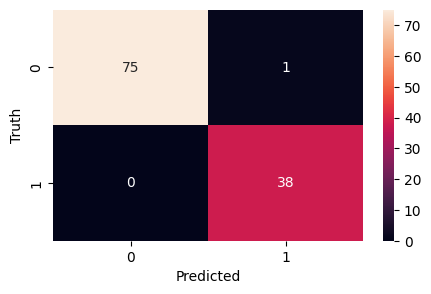

In [296]:
cm = tf.math.confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Model Selection / Conclusion

In [297]:
compare

Model  Training Accuracy  Testing Accuracy  \
0           Logistic Regression           0.984615          1.000000   
1        Support Vector Machine           0.982418          0.991228   
2                           KNN           0.971429          0.956140   
3         Gaussian Naives Bayes           0.934066          0.956140   
4                 Decision Tree           1.000000          0.947368   
5                 Random forest           1.000000          0.964912   
6             Gradient Boosting           0.991209          0.982456   
7   Stochastic Gradient Descent           0.984615          0.973684   
8                       XGBoost           1.000000          1.000000   
9                          LGBM           0.991209          0.973684   
10               Neural Network           0.986813          0.991228   

    F1 Score    Recall  Precision  
0   1.000000  1.000000   1.000000  
1   0.986667  0.973684   1.000000  
2   0.931507  0.894737   0.971429  
3   0.929577  0.868421   1.000000  
4   0.921053  0.921053   0.921053  
5   0.944444  0.894737   1.000000  
6   0.972973  0.947368   1.000000  
7   0.962025  1.000000   0.926829  
8   1.000000  1.000000   1.000000  
9   0.958904  0.921053   1.000000  
10  0.987013  1.000000   0.974359

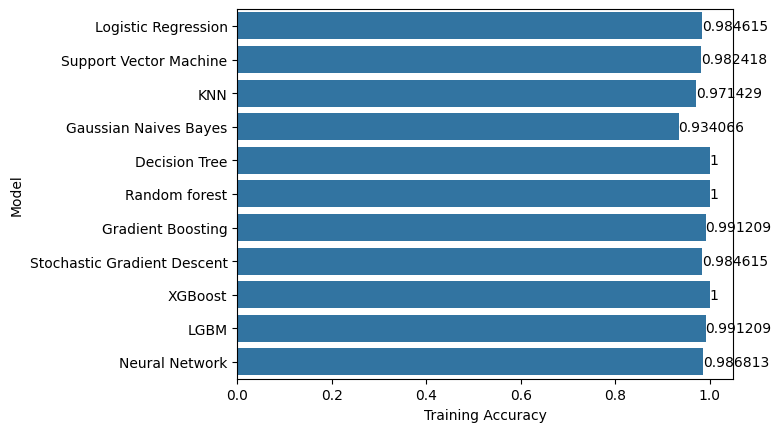

In [298]:
ax=sns.barplot(data=compare,y='Model',x='Training Accuracy')
for i in ax.containers:
    ax.bar_label(i)

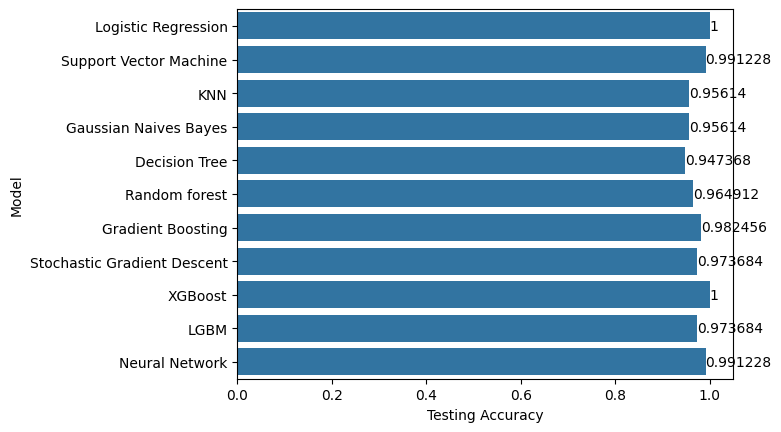

In [299]:
ax=sns.barplot(data=compare,y='Model',x='Testing Accuracy')
for i in ax.containers:
    ax.bar_label(i)

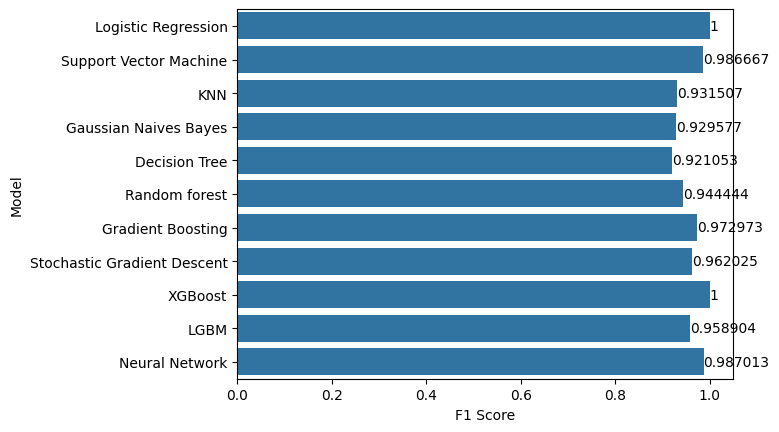

In [300]:
ax=sns.barplot(data=compare,y='Model',x='F1 Score')
for i in ax.containers:
    ax.bar_label(i)

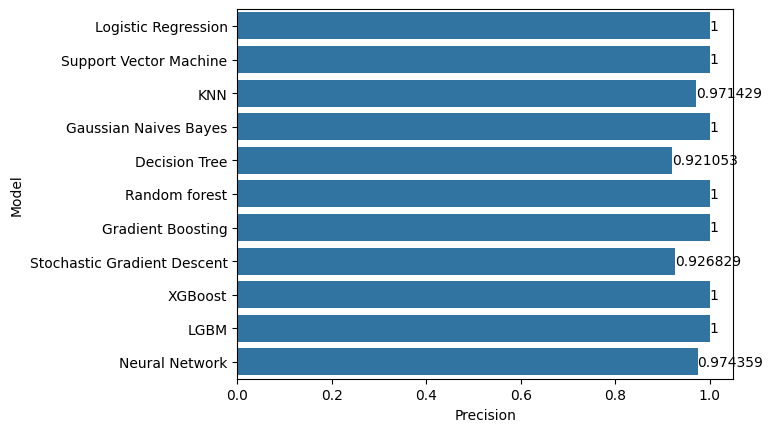

In [301]:
ax=sns.barplot(data=compare,y='Model',x='Precision')
for i in ax.containers:
    ax.bar_label(i)

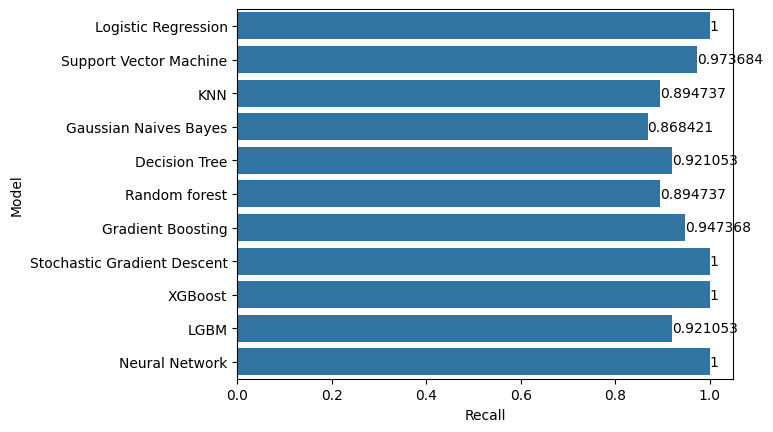

In [302]:
ax=sns.barplot(data=compare,y='Model',x='Recall')
for i in ax.containers:
    ax.bar_label(i)

# Prediction

In [317]:
# i will be using Neural Network for prediction
def predict_cancer(input):
    df=scaler.transform(np.array([input]))
    prediction = model.predict(df)
    prediction_label = np.argmax(prediction)
    return 'The tumor is Malignant (cancerous)' if prediction_label==1 else 'The tumor is Benign (non-cancerous)'

In [318]:
List_col=[col for col in X.columns]
List_col.insert(0,'id')
print(List_col)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:

# PREDICATIOn SYSYTEM BY DIPANSHU Mishra and abhinash madhavan
import joblib


# Get user input
print("-" * 110)
print("\t\t\t *** BREAST CANCER PREDICTION SYSTEM ***")
print("-" * 110)
print("Please enter all feature values **separated by spaces or commas**:")

# Take input and process it
input_data = input("Enter values: ").replace(",", " ").split()  
input_data = [float(x) for x in input_data]  

# Get prediction
result = predict_cancer(input_data)

# Display the result
print("\n" + "-" * 110)
print("PREDICTION:", result)
print("-" * 110)


--------------------------------------------------------------------------------------------------------------
			 *** BREAST CANCER PREDICTION SYSTEM ***
--------------------------------------------------------------------------------------------------------------
Please enter all feature values **separated by spaces or commas**:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

--------------------------------------------------------------------------------------------------------------
PREDICTION: The tumor is Benign (non-cancerous)
--------------------------------------------------------------------------------------------------------------
